# Unemployment rate with level of education
by Jan Theil (6099756), 25.11.2021

---

## Summary
The correlation between education and unemplyments rates in Germany and the USA is evaluated in this project.

## Tasks
The project follows the following steps:
0. Collect and download needed data.
1. Explore the data about education and employment rates collected from multiple websites.
    1. Extract the needed (real) data out of the raw data sets. -> `processing_data.csv`
    2. Visualize data with e.g. histogram, mean, box-plots, ...
    3. Pearson correlation coefficient.
2. Linear regression.
3. RSS vs. polyfit.
4. Pairs bootstrap between education and unemployment rates + condifence intervals.
5. Plot bootstrap regressions.
6. Hypothesis test on Pearson correlation.
7. Conclusions.
8. Check conclusion against known literature.

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from data import read_raw_data, merge_and_clean_data


# Task 1

---------------------------------------------

## Explore data

In order to extract the needed data, the raw data firstly has to be inspected.

## What I found
- The data column names and datatypes are different.
- Eurostat data contains more countries than OECD data.
- Eurostat data slightly differs from OECD data (for Germany).

## Next Step:
- Normalize column names.
- Extract Germany from eurostrat data set.
- Merge all 3 data sets into one.
- Get the mean between OECD and eurostat data for Germany, because they differ slightly but mostly fit.
- Save merged and cleaned data set in `unemployment_edu.csv`.

EUROSTAT


,TIME,GEO,SEX,AGE,ISCED11,UNIT,Value,Flag and Footnotes
0,2002,European Union - 28 countries (2013-2020),Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,10.1,NaN
1,2002,European Union - 15 countries (1995-2004),Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,9.1,NaN
2,2002,Euro area - 19 countries (from 2015),Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,9.9,NaN
3,2002,Belgium,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,9.8,NaN
4,2002,Bulgaria,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,27.6,NaN
...,...,...,...,...,...,...,...,...
641,2018,United Kingdom,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,5.0,NaN
642,2018,Montenegro,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,21.0,NaN
643,2018,North Macedonia,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,23.1,NaN
644,2018,Serbia,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,13.4,NaN


['European Union - 28 countries (2013-2020)'
 'European Union - 15 countries (1995-2004)'
 'Euro area - 19 countries  (from 2015)' 'Belgium' 'Bulgaria' 'Czechia'
 'Denmark' 'Germany (until 1990 former territory of the FRG)' 'Estonia'
 'Ireland' 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia'
 'Lithuania' 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria'
 'Poland' 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden'
 'Iceland' 'Norway' 'Switzerland' 'United Kingdom' 'Montenegro'
 'North Macedonia' 'Serbia' 'Turkey']

OECD


C:\Users\janth\AppData\Local\Temp/ipykernel_16804/3651485118.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurostat_germany_low["TIME"] = eurostat_germany_low["TIME"].astype(int)
C:\Users\janth\AppData\Local\Temp/ipykernel_16804/3651485118.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurostat_germany_low["Value"] = eurostat_germany_low["Value"].astype(float)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2002,15.316512,NaN
1,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2003,18.005415,NaN
2,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2004,20.498941,NaN
3,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2005,20.146818,NaN
4,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2006,19.845667,NaN
5,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2007,17.995710,NaN
6,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2008,16.505592,NaN
7,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2009,16.732357,NaN
8,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2010,15.897300,NaN
9,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2011,13.904875,NaN


['DEU' 'USA' 'OAVG']


C:\Users\janth\AppData\Local\Temp/ipykernel_16804/3651485118.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data_low["TIME"] = oecd_data_low["TIME"].astype(int)
C:\Users\janth\AppData\Local\Temp/ipykernel_16804/3651485118.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data_low["Value"] = oecd_data_low["Value"].astype(float)


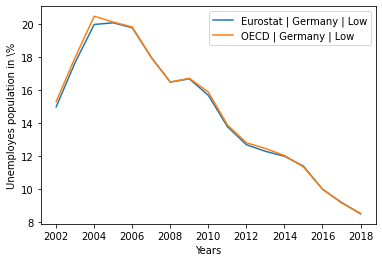

In [2]:
# Inspect raw data of euro stat
eurostat = Path("raw_data", "eurostat")
eurostat_data = read_raw_data(low_file=eurostat.joinpath("EuroStat_Low_Germany.csv"),
                              middle_file=eurostat.joinpath("EuroStat_Middle_Germany.csv"),
                              high_file=eurostat.joinpath("EuroStat_High_Germany.csv"))

print("EUROSTAT\n=============")
display(eurostat_data["Low"])
print(eurostat_data["Low"]["GEO"].unique())

# Get data from Germany and plot it
df = eurostat_data["Low"]
eurostat_germany_low = df.loc[df["GEO"] == "Germany (until 1990 former territory of the FRG)"]
eurostat_germany_low["TIME"] = eurostat_germany_low["TIME"].astype(int)
eurostat_germany_low["Value"] = eurostat_germany_low["Value"].astype(float)
plt.xlabel("Years")
plt.ylabel("Unemployes population in \%")
plt.plot("TIME", "Value", data=eurostat_germany_low, label="Eurostat | Germany | Low")

# Inspect raw data of OECD
oecd = Path("raw_data", "oecd")
oecd_data = read_raw_data(low_file=oecd.joinpath("OECD_Low_Germany_USA.csv"),
                          middle_file=oecd.joinpath("OECD_Middle_Germany_USA.csv"),
                          high_file=oecd.joinpath("OECD_High_Germany_USA.csv"))
print("\nOECD\n=============")
display(oecd_data["Low"])
print(oecd_data["Low"]["LOCATION"].unique())

# Get data from Germany and plot it
df = oecd_data["Low"]
oecd_data_low = df.loc[df["LOCATION"] == "DEU"]
oecd_data_low["TIME"] = oecd_data_low["TIME"].astype(int)
oecd_data_low["Value"] = oecd_data_low["Value"].astype(float)
plt.plot("TIME", "Value", data=oecd_data_low, label="OECD | Germany | Low")
plt.legend()
plt.show()


## Merge and clean data

Merge the data sets provided by eurostrat and OECD and save the normalized data set into `unemployment_edu.csv`.

In [3]:
# Extracting, cleaning and merging data is done by the following helper function:
clean_data = merge_and_clean_data(eurostat_data, oecd_data)
display(clean_data)

Empty DataFrame
Columns: [Country, Year, Unemployment, Education]
Index: []
Empty DataFrame
Columns: [Country, Year, Unemployment, Education]
Index: []
Empty DataFrame
Columns: [Country, Year, Unemployment, Education]
Index: []


,Country,Year,Unemployment,Education
